In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
#spec_file = sorted(glob.glob("*grpspec.fits"))
#spec = Spectrum(spec_file[0])

spec = Spectrum(glob.glob("*M239*cash.fits")[0],backFile=glob.glob("*M239*spec_bkg.fits")[0],respFile=glob.glob("*M239*.rmf")[0],arfFile=glob.glob("*M239*.arf")[0])



1 spectrum  in use
 
Spectral Data File: 0886070501_M239spec_cash.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.756e-04 +/- 3.688e-04 (38.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-140
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.91e+04 sec
 Using fit statistic: cstat
 Using Background File                0886070501_M239spec_bkg.fits
  Background Exposure Time: 1.91e+04 sec
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Net count rate (cts/s) for Spectrum:1  8.756e-04 +/- 3.688e-04 (38.9 % total)
***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).
Response successfully loaded.
Arf successfully loaded.
Spectrum 1  Spectral Data File: 08860705

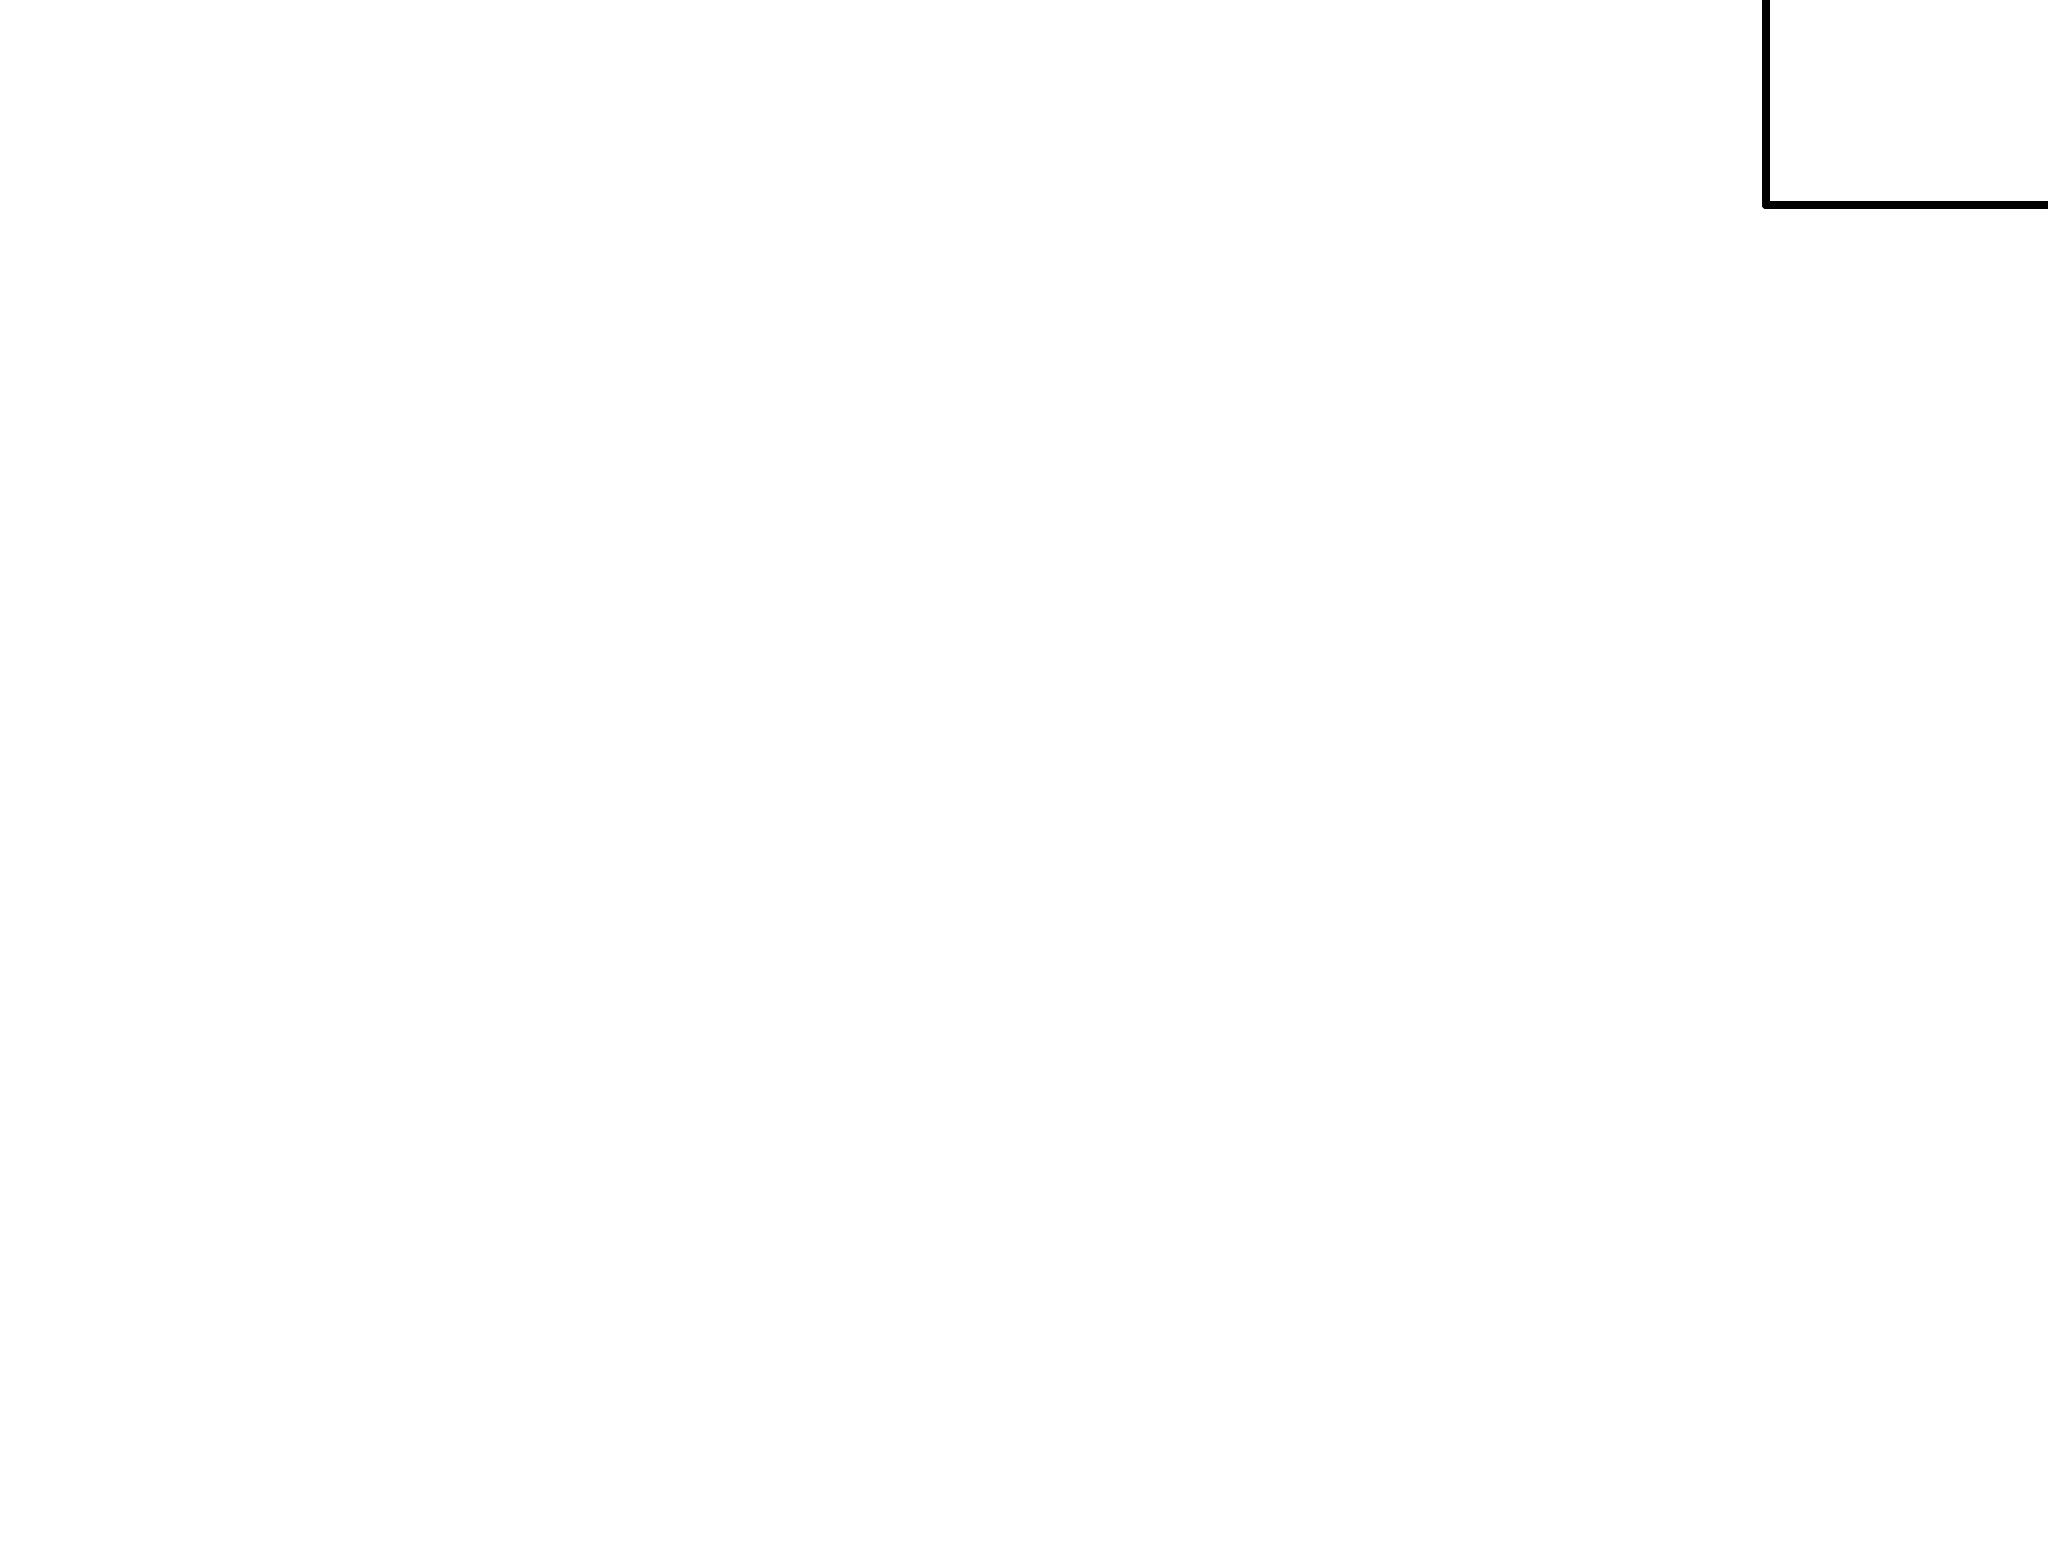

     5 channels (1-5) ignored in spectrum #     1
     1 channels (140) ignored in spectrum #     1



In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot.addCommand("Rescale X 0.1 15")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic

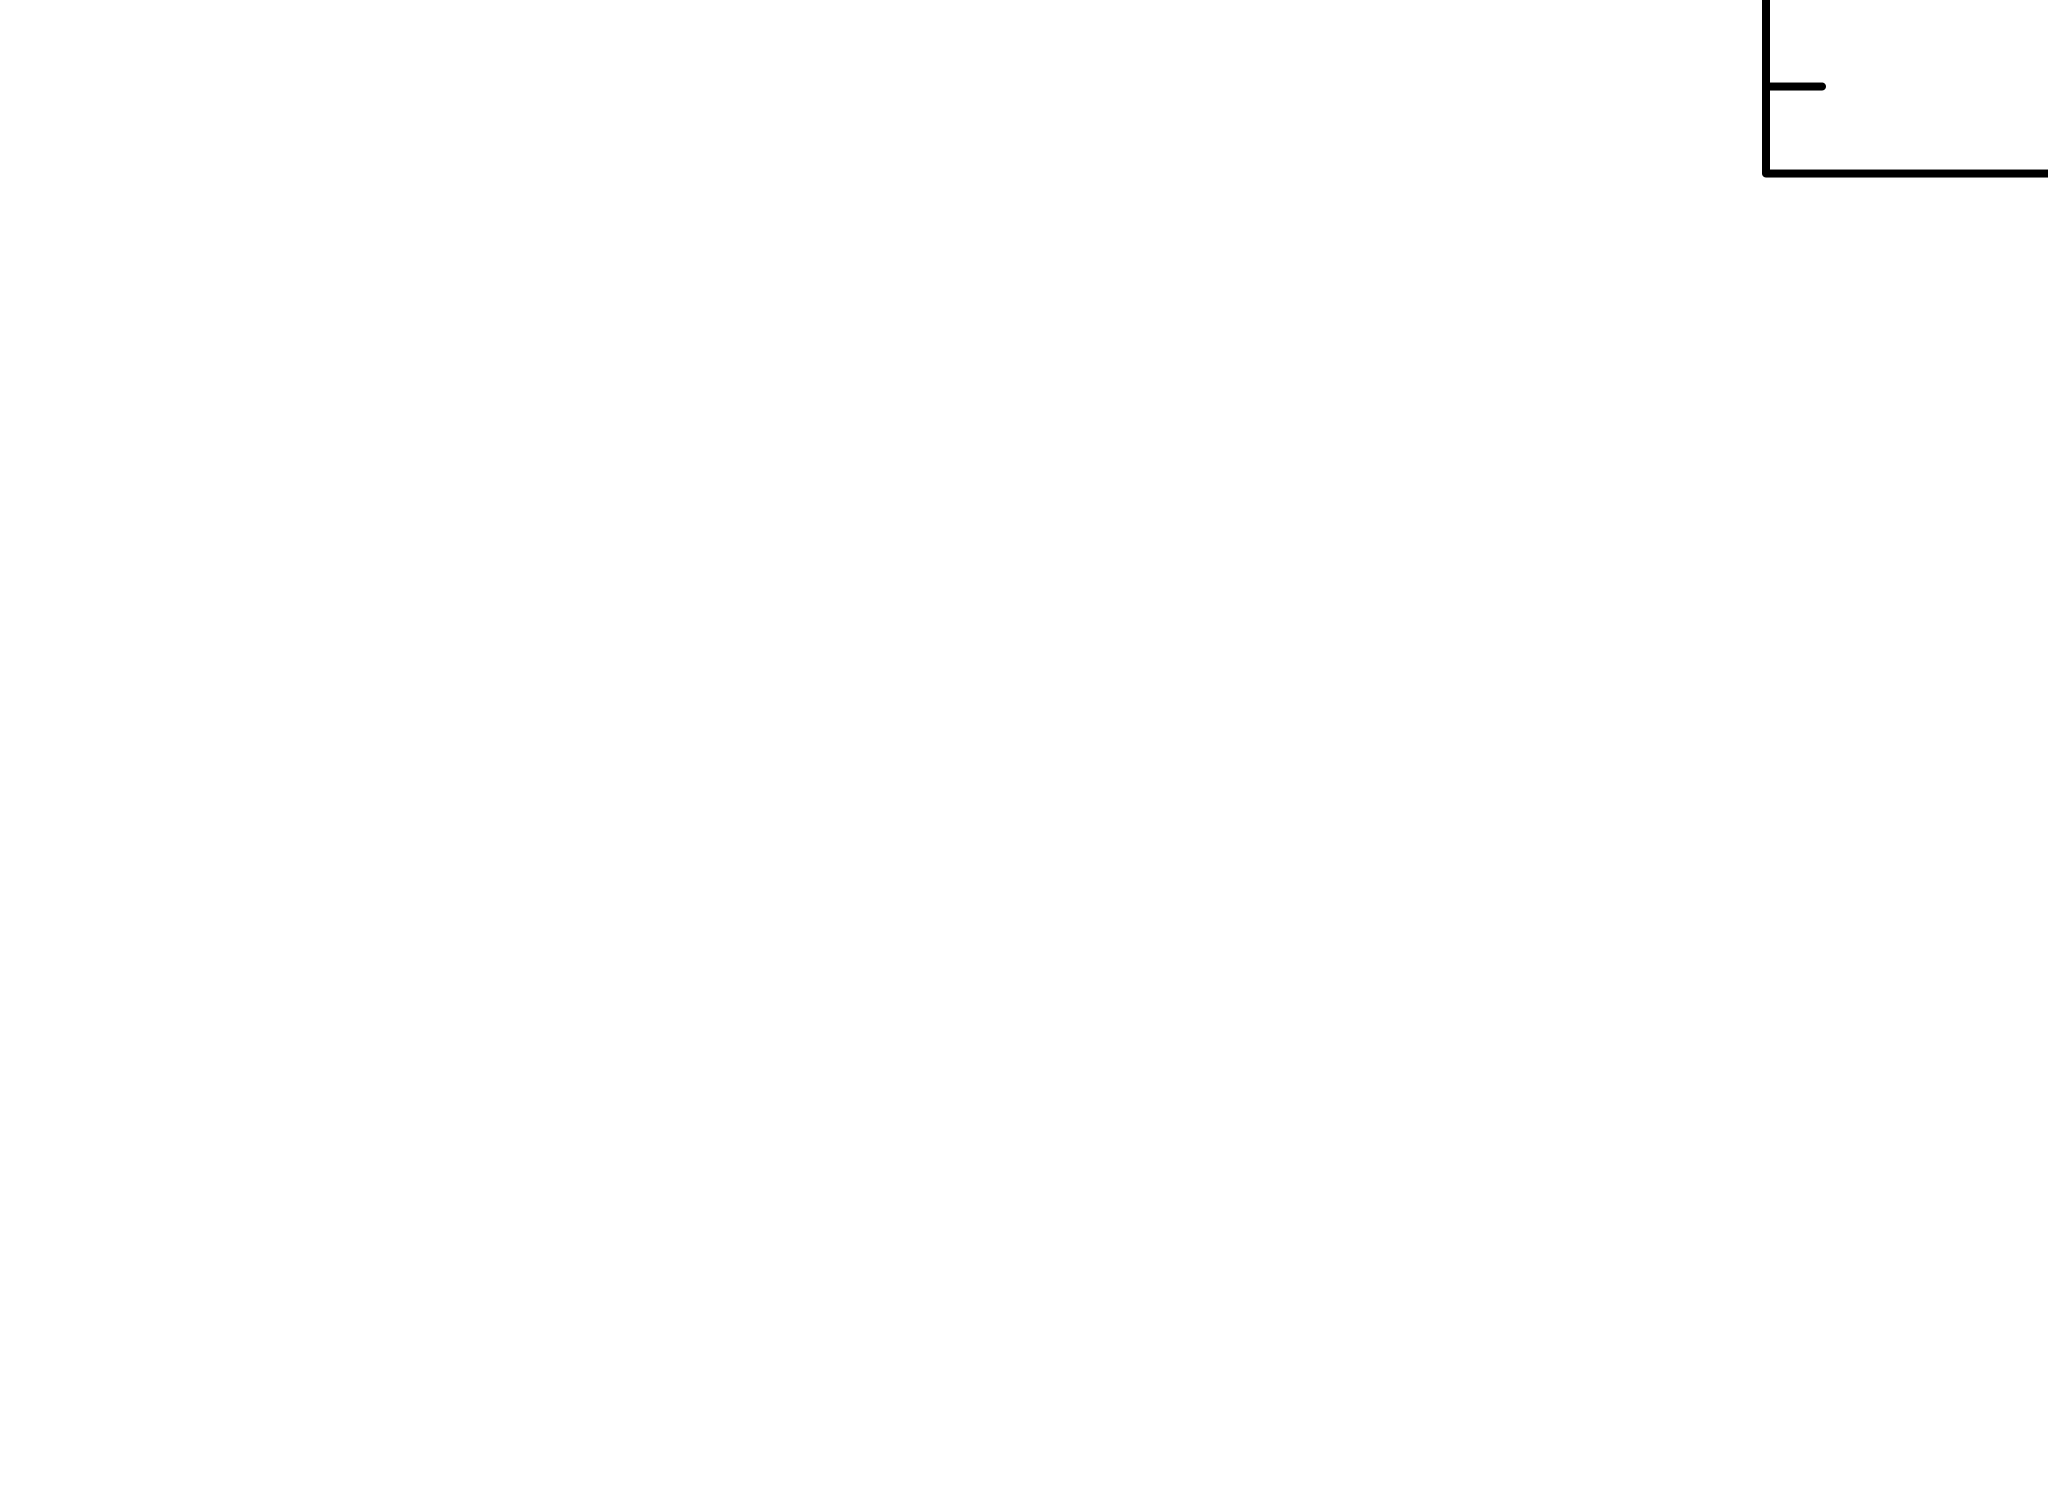

              7.964005e+06     using 134 bins.

Test statistic : Chi-Squared              2.448607e+12     using 134 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 131 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
542540       1.63447e+06  -3      0.209531       197.824       7397.98
35576.8      15338.9      -3     0.0226504       199.111       482.941
14511.2      1288.49      -3     0.0101770       199.261       199.489
4203.69      540.395      -3   0.000342549       199.325       59.9633
1721.08      161.159      -4   0.000159197       199.347       25.8133
610.313      66.4711      -3   7.52677e-05       199.363       9.93217
145.191      24.3712      -4   3.64048e-05       199.249       2.37973
89.4086      8.67077      -5   7.12391e-06

In [4]:
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.702327e+06     using 134 bins.

Test statistic : Chi-Squared              8.758012e+11     using 134 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 131 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
81.4325      1.1808e+06    0       10698.4       5.59066      0.400132
81.4325      3.09399e-37  

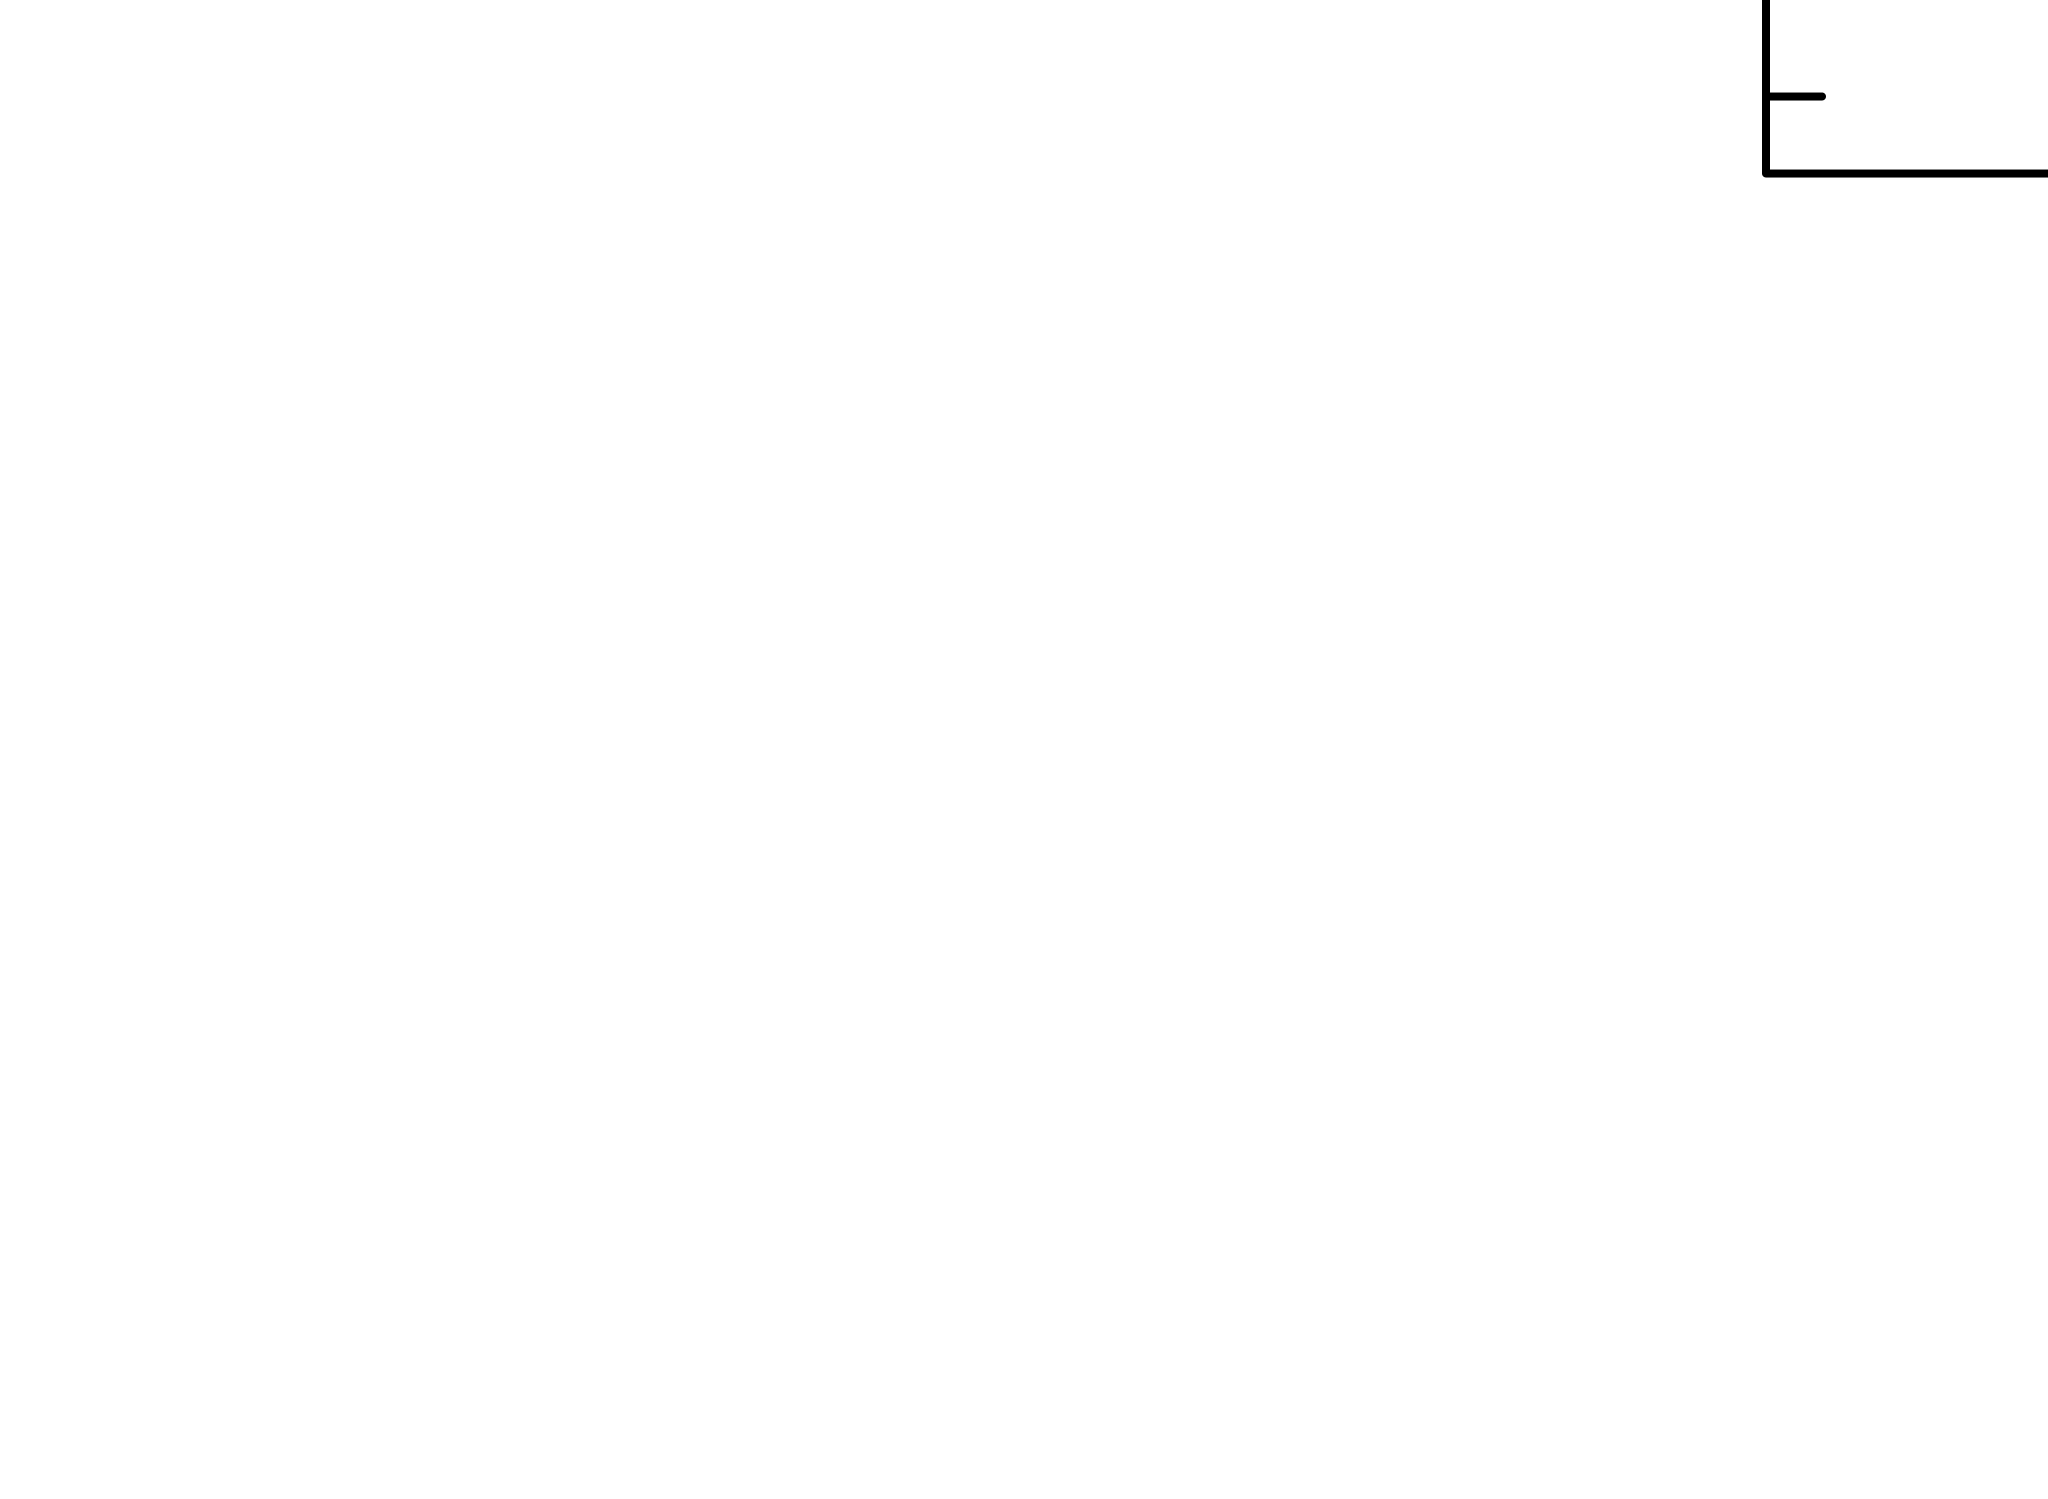

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.959697e+06     using 134 bins.

Test statistic : Chi-Squared              1.748388e+11     using 134 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 131 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
502020       365404       -3      0.424801       198.432      0.304255
214397       281261       -2

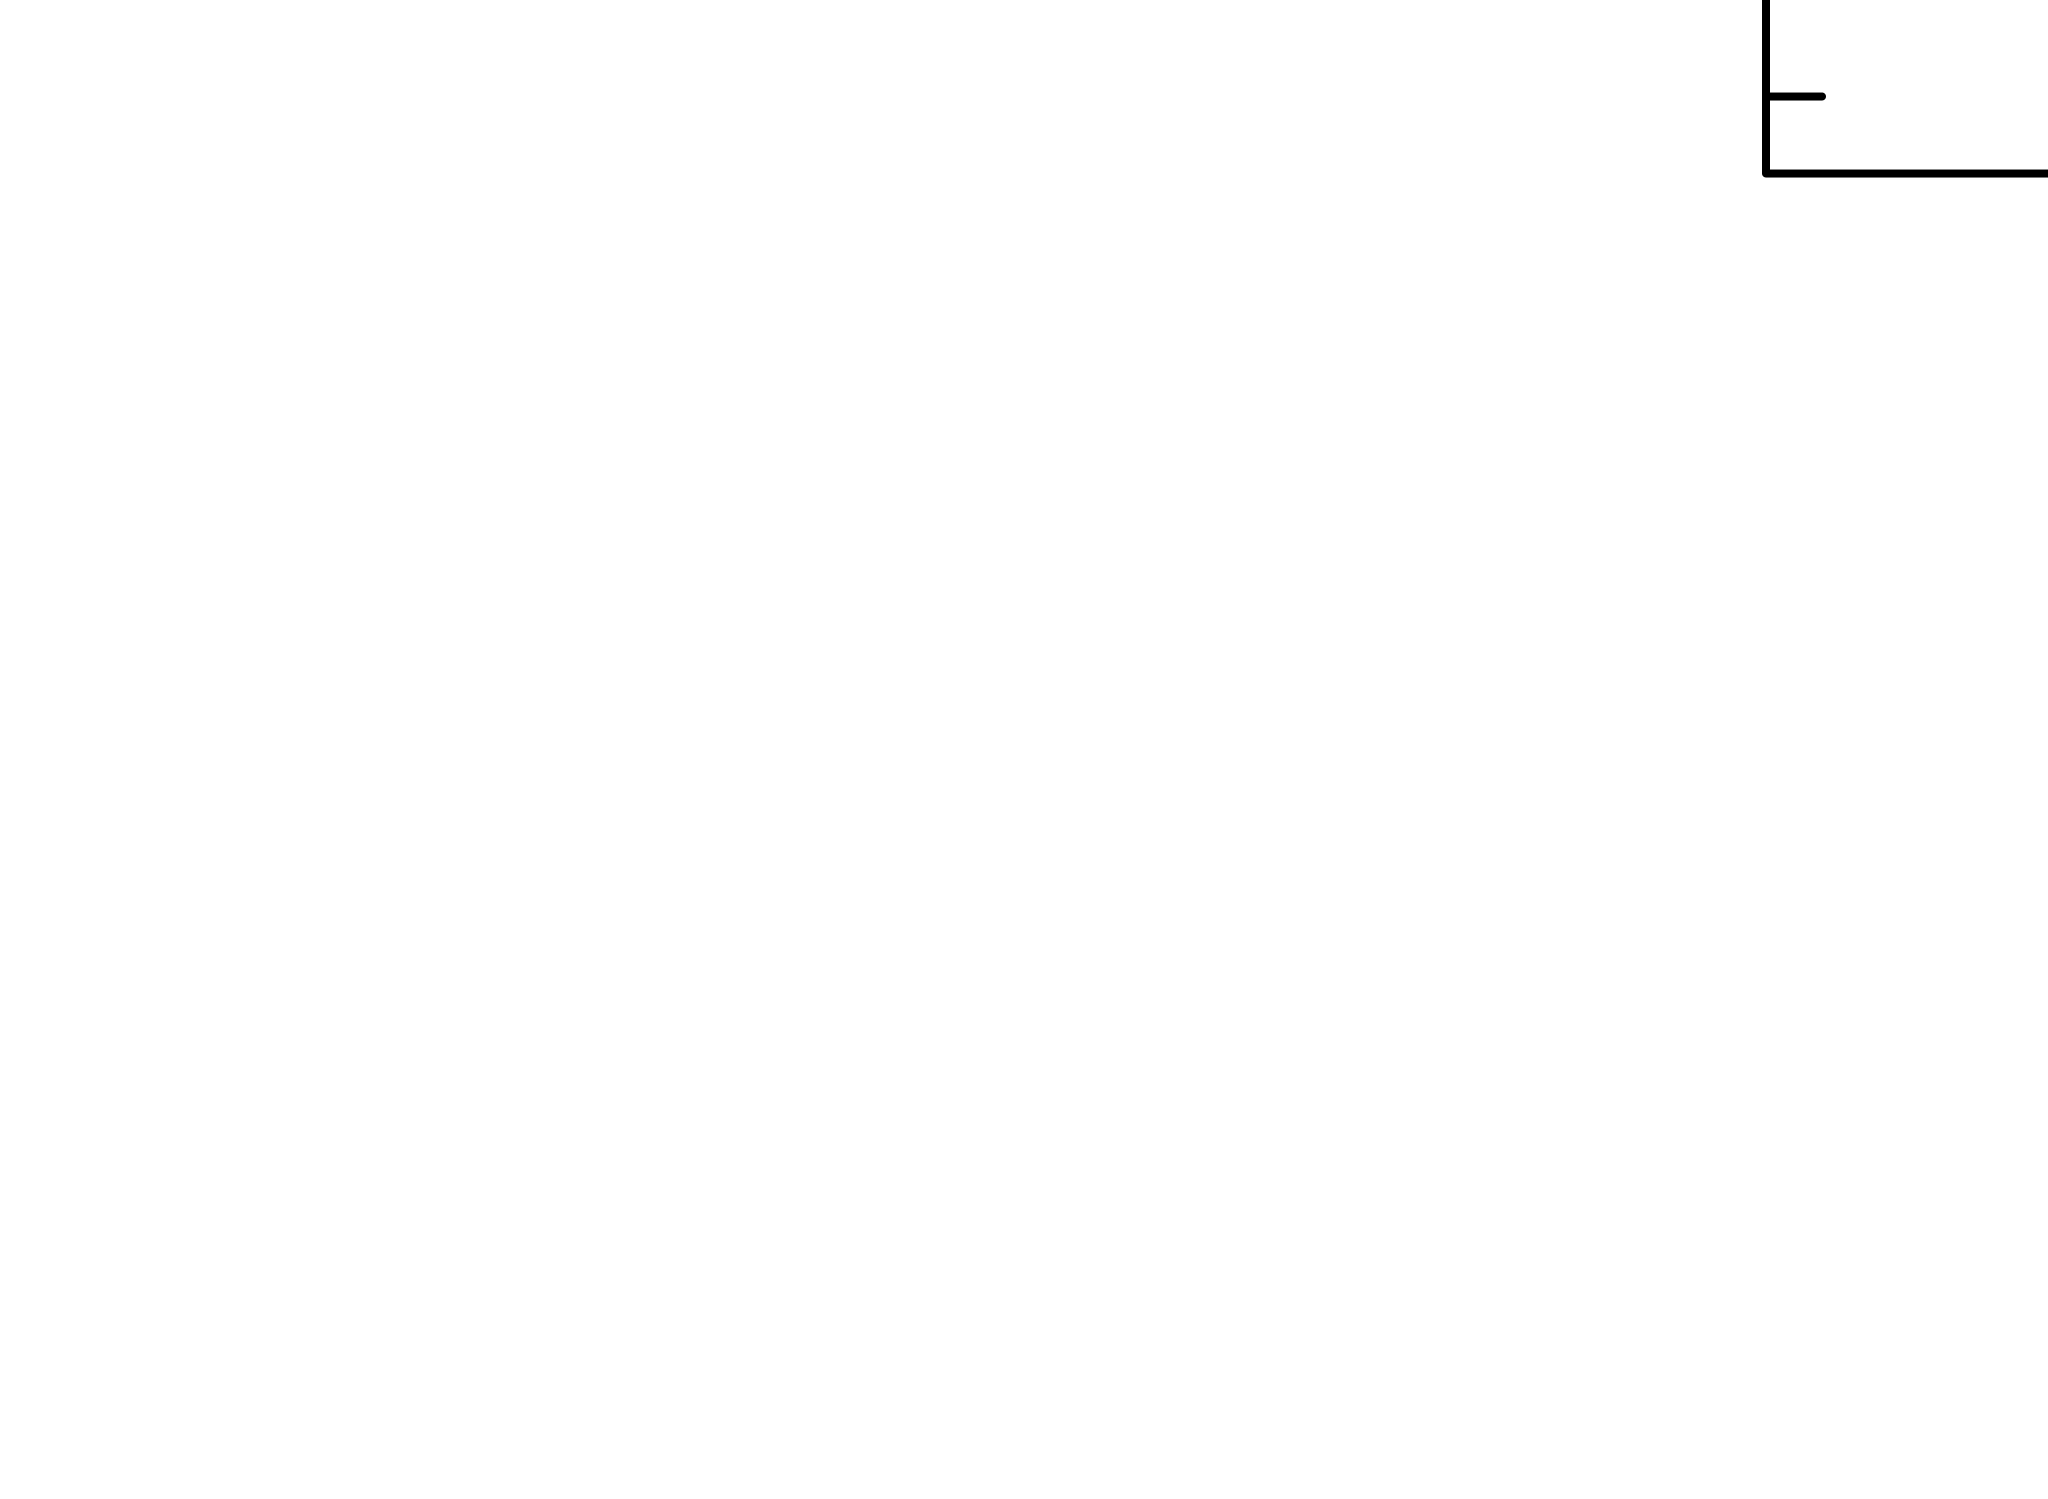

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                739534.6     using 134 bins.

Test statistic : Chi-Squared              1.109839e+11     using 134 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 131 degrees of freedom
 Current data and model not fit yet.
               

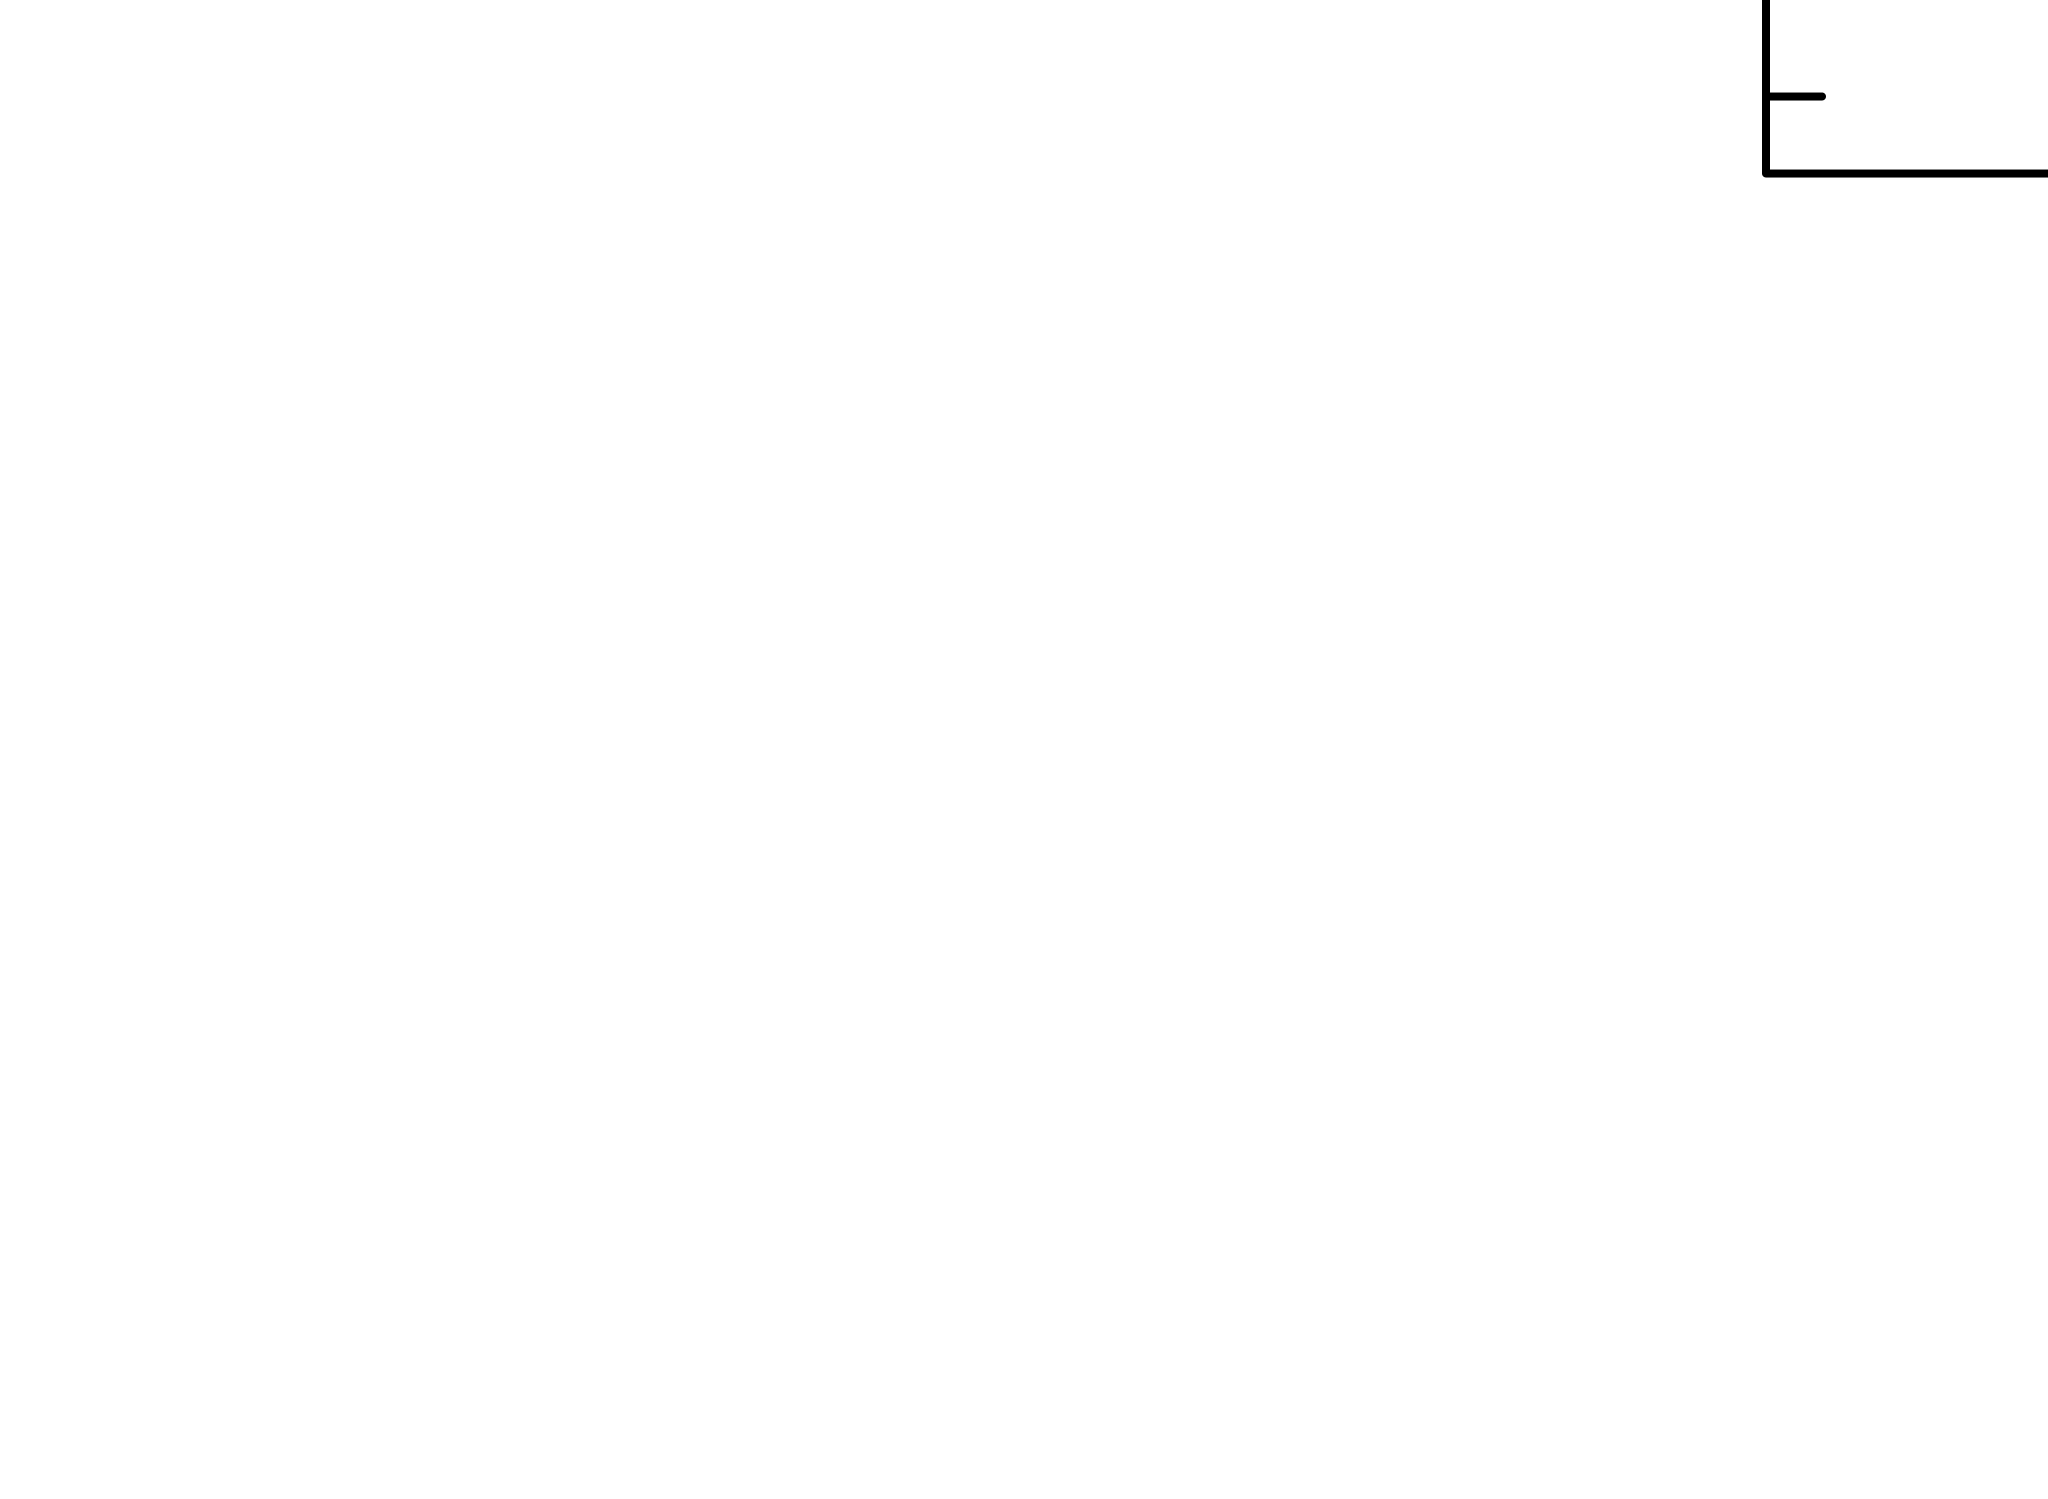

                    Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
81.4325      214784       -3       23558.8      0.416330       3751.43
81.4325      9.96153e-79  -4       23558.8      0.416330       3751.43
 Variances and Principal Axes
                 1        2        5  
 -NAN      |  1.0000   0.0000   0.0000  
 NAN       |  0.0000     -nan     -nan  
 -NAN      |  0.0000     -nan     -nan  
----------------------------------------

  Covariance Matrix
        1           2           3   
        -nan        -nan        -nan
        -nan        -nan        -nan
        -nan        -nan        -nan
------------------------------------

Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    2.35588E+04  +/-  -nan         
   2    2   apec       kT         keV      0.416330     +/-  -nan         
   3    2   apec       Abundanc            1.00000      f

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 8.595e-84 photons (1.6488e-91 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 0.2744
d_kpc = 1/plx
F_x = 1.6234*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.5789255831167283e+32


In [10]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

3.644314868804665
32.411438810417096


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.88)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.1727064101695894e-13
F_x / F_opt:  0.14123624256114856



Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.479566e+06     using 134 bins.

Test statistic : Chi-Squared              4.439336e+11     using 134 bins.

***Warning: Chi-square ma

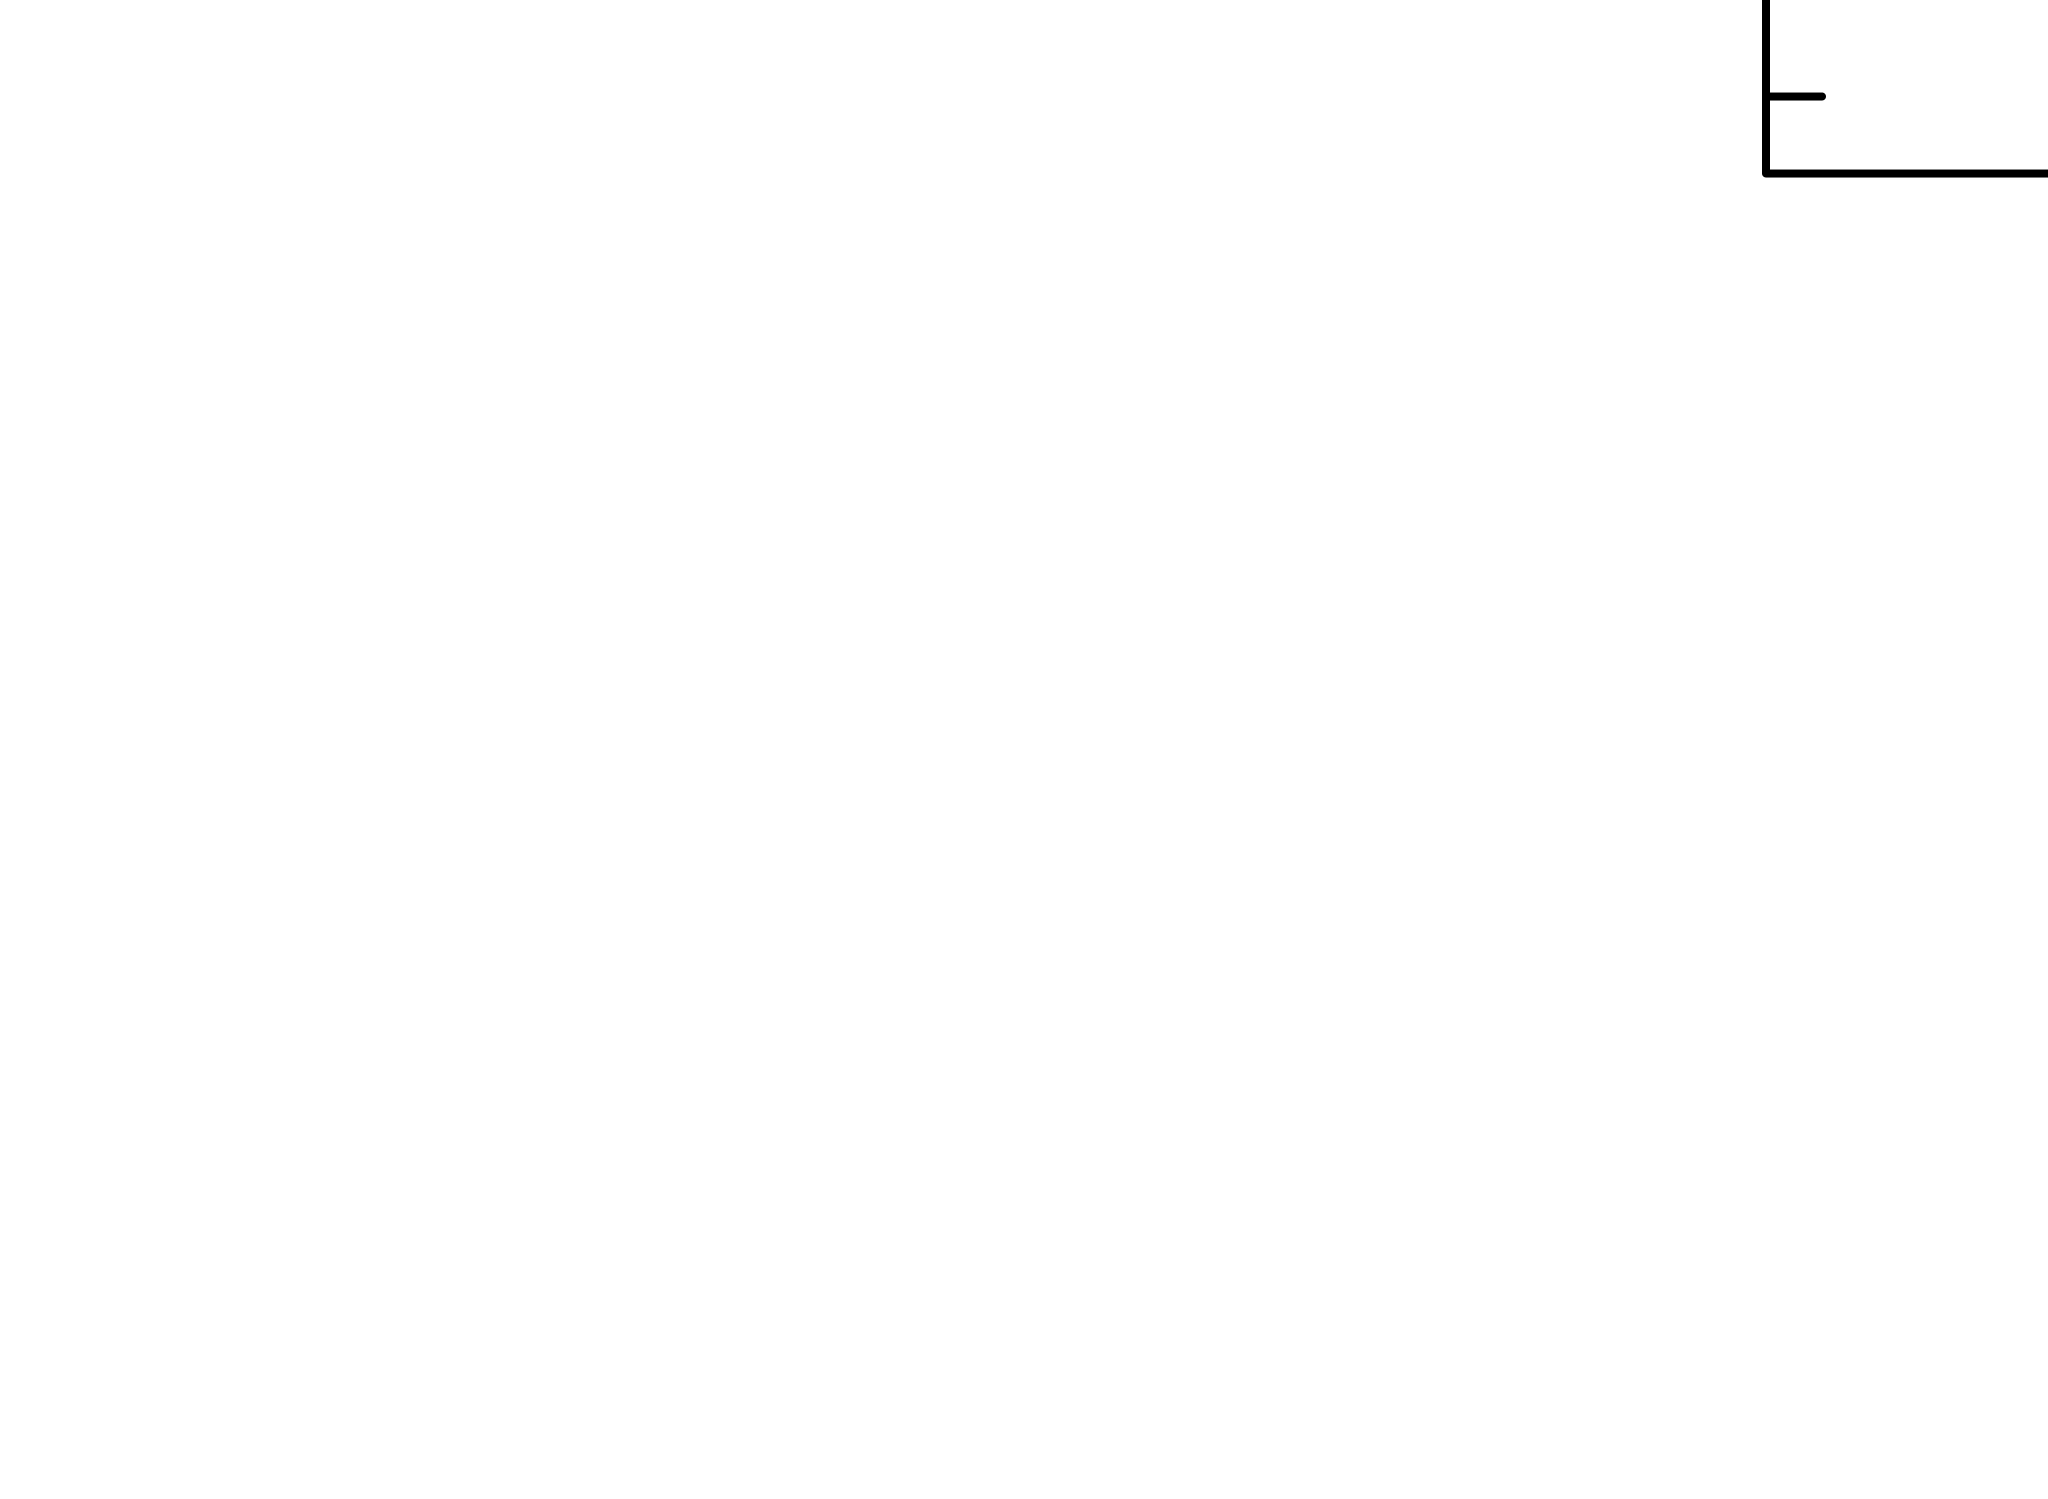

In [12]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4.0
Fit.perform()
Plot("data resid")